# OLYMPICS DATA ANALYSIS 

# 1. Importing all the libraries required.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
from warnings import filterwarnings

# 2. Loading the olympics dataset.

In [8]:
dfA= pd.read_csv("athlete_events.csv")
dfR= pd.read_csv("noc_regions.csv")

# 3. Checking the shape of the dataset.

In [14]:
print(dfA.shape)
print(dfR.shape)

(271116, 15)
(230, 3)


In [15]:
dfA.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [16]:
dfA.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [17]:
dfR.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [18]:
dfR.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


# 4. Visualizing the missing data.

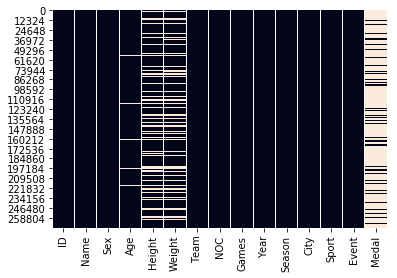

In [21]:
sns.heatmap(dfA.isnull(), cbar=False)

From above plot it is clear that Age, Height, Weight and Medal columns have missing valuues.
But we won't take Medal into consideration as there will be many players who haven't won any Medal. So, it's obvious to impute values of only Age, Weight & Height while imputing it to the dataset.

# 5. Merging both tables.

In [26]:
df = pd.merge(dfA, dfR, on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


# 6. Finding out participation of Male v/s Female in Olympics.

In [27]:
df = df.drop(['ID', 'Games', 'Event', 'notes'], axis='columns')
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN,China
2,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,NaN,China
3,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,NaN,China
4,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,NaN,China


Text(0.5,1,'Male v/s Female Players Participation in Olympics (1896-2016)')

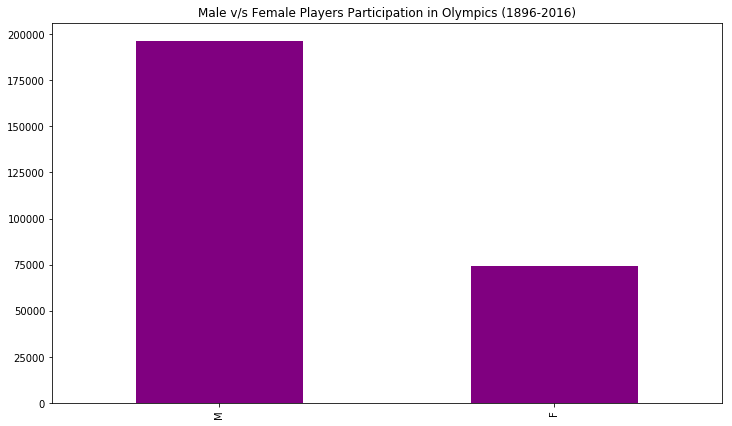

In [40]:
df.Sex.value_counts().plot(kind='bar', color='purple', figsize=(12,7))
plt.title("Male v/s Female Players Participation in Olympics (1896-2016)")

From above plot it is evident that more number of male players participated in Olympics than female players from 1896 to 2016.

# 7. Finding out no. of players participated in summer v/s winter olympics.

Text(0,0.5,'Number of participants')

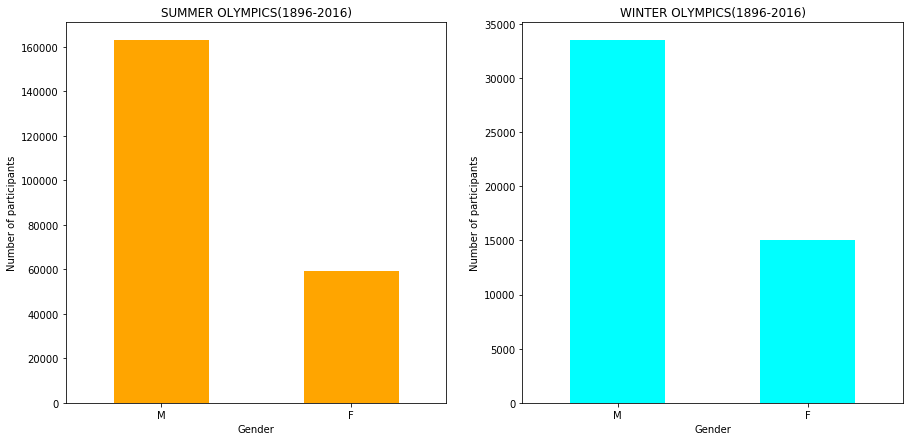

In [46]:
plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)
df[df.Season == 'Summer'].Sex.value_counts().plot(kind='bar', color='orange')
plt.title("SUMMER OLYMPICS(1896-2016)")
plt.xlabel("Gender")
plt.xticks(rotation = 0)
plt.ylabel("Number of participants")
plt.subplot(1, 2, 2)
df[df.Season == 'Winter'].Sex.value_counts().plot(kind='bar', color='cyan')
plt.title("WINTER OLYMPICS(1896-2016)")
plt.xlabel("Gender")
plt.xticks(rotation = 0)
plt.ylabel("Number of participants")

From above plot it can be observed that more number of players participated in Summer Olympics than Winter Olympics from 1896-2016.

# 8. Frequency of players participating in Olympics over the years.

Text(0.5,1,'Frequency of players participating in the Olympics game (1896-2016)')

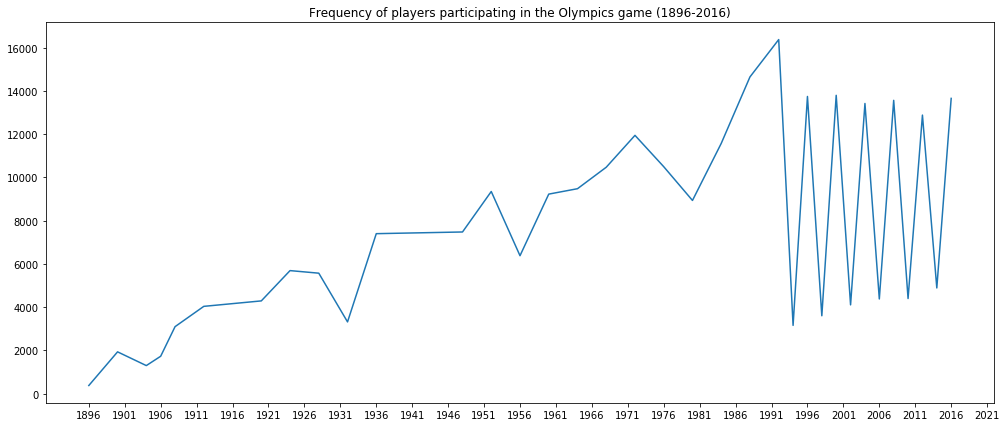

In [67]:
dy = df.groupby('Year').Name.count().head()

plt.figure(figsize=[17,7])
plt.xticks(np.arange(df.Year.min(), df.Year.max()+10, 5))
plt.plot(df.groupby('Year').Name.count())
plt.title('Frequency of players participating in the Olympics game (1896-2016)')

Text(0.5,1,'Frequency of players participating in Winter Olympics (1924-2016)')

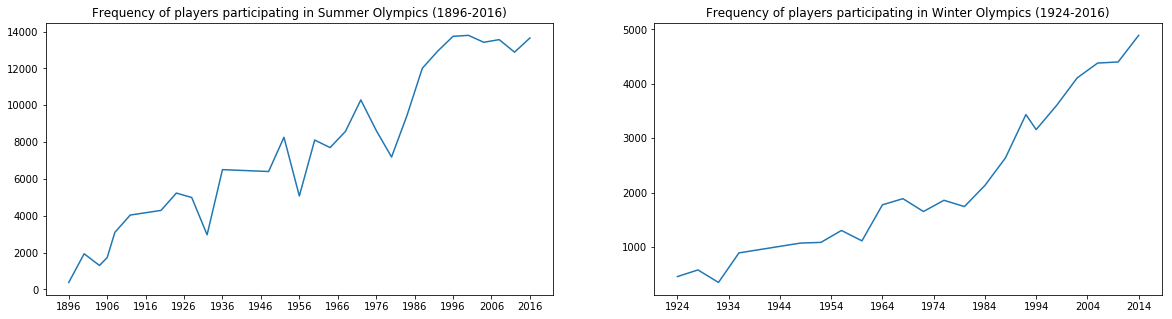

In [61]:
summer_olympics = df[df.Season == 'Summer']
winter_olympics = df[df.Season == 'Winter']

plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
plt.plot(summer_olympics.groupby('Year').Name.count())
plt.xticks(np.arange(summer_olympics.Year.min(), summer_olympics.Year.max()+10, 10))
plt.title('Frequency of players participating in Summer Olympics (1896-2016)')

plt.subplot(1, 2, 2)
plt.plot(winter_olympics.groupby('Year').Name.count())
plt.xticks(np.arange(winter_olympics.Year.min(), winter_olympics.Year.max()+10, 10))
plt.title('Frequency of players participating in Winter Olympics (1924-2016)')

From above plots, it is evident that the numbers of players participating in the olympics have increased over the years.

# 9. Determing Weight, Height & Age distribution of the players.

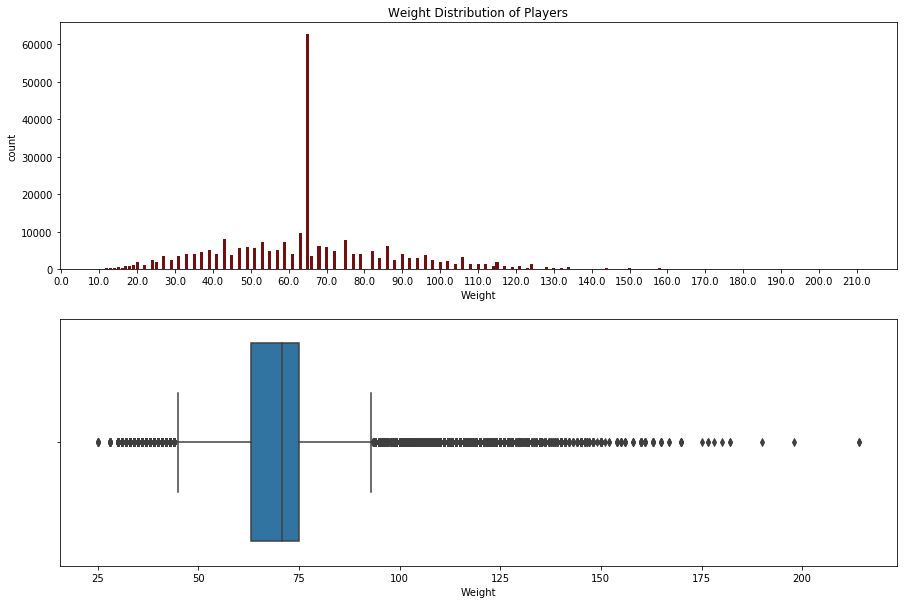

In [84]:
fig = plt.figure(figsize=[15,10])         #Weight distribution of players
plt.subplot(2, 1, 1)
plt.title('Weight Distribution of Players')

sns.countplot(data=df, x='Weight', color='maroon')

plt.xticks(np.arange(0, max(df.Weight), step=10), np.arange(0, max(df.Weight), step=10))
plt.subplot(2, 1, 2)
sns.boxplot(df.Weight)

From above it is clear that the average weight of players is between 60-70Kg

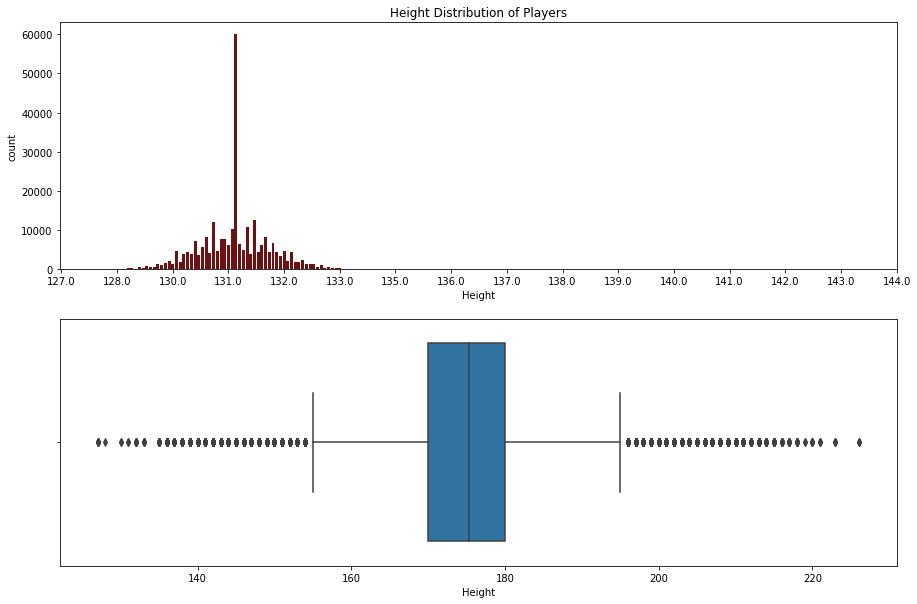

In [87]:
fig = plt.figure(figsize=[15,10])            #height distribution of players
plt.subplot(2, 1, 1)
plt.title('Height Distribution of Players')

sns.countplot(data=df, x='Height', color='maroon')

plt.xticks(np.arange(0, max(df.Height), step=15))
plt.subplot(2, 1, 2)
sns.boxplot(df.Height)

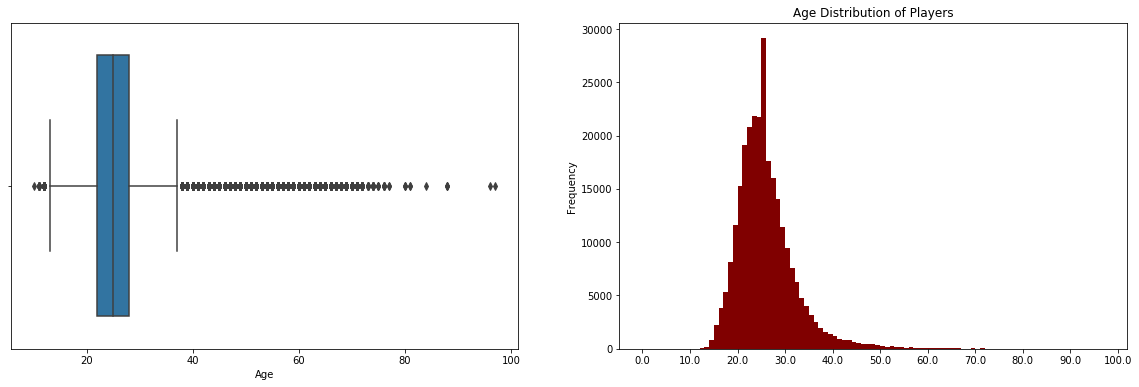

In [97]:
fig = plt.figure(figsize=[20,6])             #age distribution of players
plt.subplot(1, 2, 2)

b=np.arange(0,df.Age.max()+1,1)
plt.hist(data=df,x='Age',bins=b, color='maroon')

t=np.arange(0,df.Age.max()+10,10)
plt.xticks(t,t)
plt.title('Age Distribution of Players')
plt.ylabel('Frequency')
plt.subplot(1, 2, 1)

sns.boxplot(df.Age)

From the above histogram, it is clear that majority of participants are between 20 and 30 years of age. 
There are some player of age as young as 10-15 years and some of age as old as 65-75 years which is quite interesting.

In [98]:
df[df.Age > 60].Sport.unique()

array(['Art Competitions', 'Equestrianism', 'Fencing', 'Archery', 'Roque',
       'Shooting', 'Sailing'], dtype=object)

The above output shows sports which requires less physical efforts are played by players who are above 60 years of age.

# 10. Final Evaluation of Players participating from different countries across the globe and the medals won by them.

In [99]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,NaN,China
2,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,NaN,China
3,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,NaN,China
4,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,NaN,China


In [100]:
df.tail()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Medal,region
270762,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008,Summer,Beijing,Athletics,NaN,Lesotho
270763,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012,Summer,London,Athletics,NaN,Lesotho
270764,M'apotlaki Ts'elho,F,15.0,175.3,70.7,Lesotho,LES,1996,Summer,Atlanta,Athletics,NaN,Lesotho
270765,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984,Summer,Los Angeles,Boxing,NaN,Lesotho
270766,Mosolesa Tsie,M,20.0,175.0,75.0,Lesotho,LES,2000,Summer,Sydney,Boxing,NaN,Lesotho


Text(0.5,1,'NUMBER OF PLAYERS PATICIPATING FROM DIFFERENT CITIES')

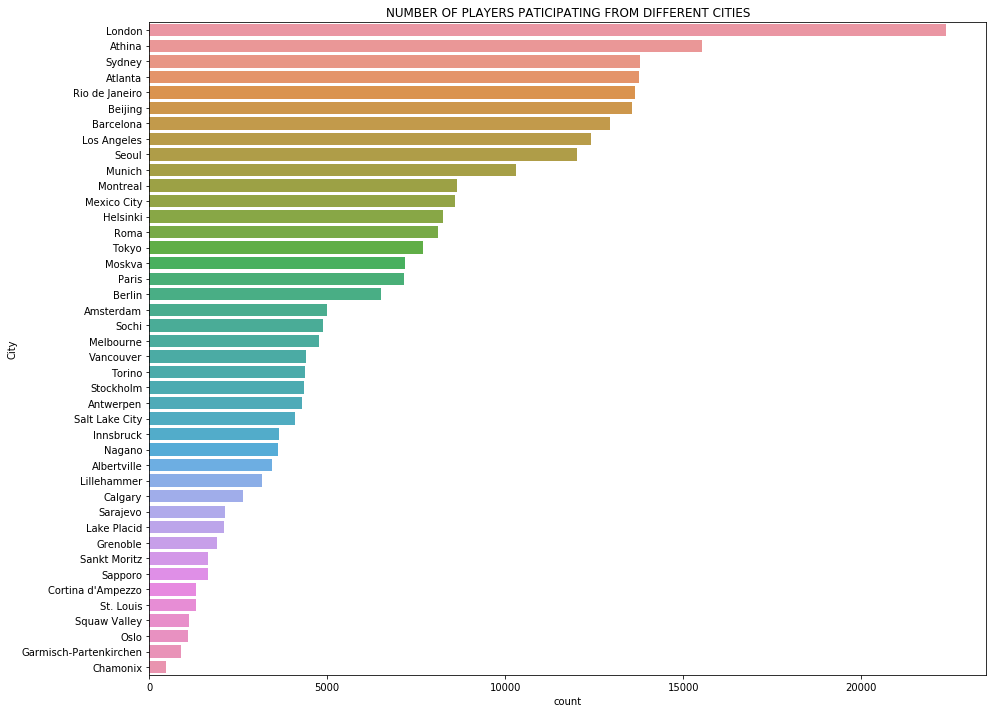

In [109]:
city = df.City.value_counts()
order_of_city = city.sort_values(ascending=False)

fig = plt.figure(figsize=[15,12])
sns.countplot(y = df.City, order=df.groupby("City").size().sort_values(ascending=False).index)
plt.title('NUMBER OF PLAYERS PATICIPATING FROM DIFFERENT CITIES (1896-2016)')

The above plot shows number of players participating in olympics from different cities in descending order.
London tops with more than 20,000 players followed by Athina and so on.

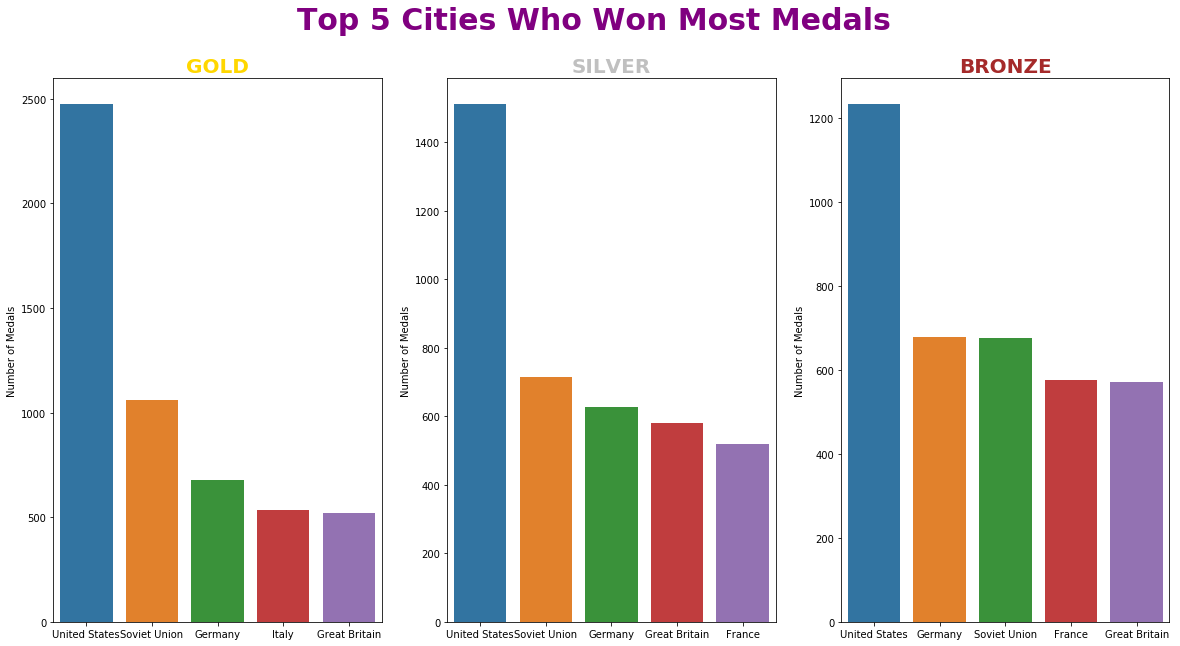

In [124]:
gold = df[df.Medal == "Gold"]
silver = df[df.Medal == "Silver"]
bronze = df[df.Medal == "Bronze"]


fig = plt.figure(figsize=[20,10])
fig.suptitle("Top 5 Cities Who Won Most Medals", fontsize=30, fontweight="bold", color="purple")

plt.subplot(1, 3, 1)
plt.title("GOLD", fontsize=20, fontweight="bold", color="gold")
plt.ylabel("Number of Medals")
gold_count = gold.Team.value_counts()[:5]
top5goldteam = gold_count.index
sns.barplot(x = top5goldteam, y = gold_count.values)

plt.subplot(1, 3, 2)
plt.title("SILVER", fontsize=20, fontweight="bold", color="silver")
plt.ylabel("Number of Medals")
silver_count = silver.Team.value_counts()[:5]
top5silverteam = silver_count.index
sns.barplot(x = top5silverteam, y = silver_count.values)

plt.subplot(1, 3, 3)
plt.title("BRONZE", fontsize=20, fontweight="bold", color="brown")
plt.ylabel("Number of Medals")
bronze_count = bronze.Team.value_counts()[:5]
top5bronzeteam = bronze_count.index
sns.barplot(x = top5bronzeteam, y = bronze_count.values)

The above plot shows top 5 cities which won most medals in the olympics from 1896-2016. Unites States tops the list in all the categories.